In [3]:
import numpy as np
import torch

In [4]:
umap = np.load('umap.npy')
clusters = np.load('kmeans.npy')

In [5]:
umap

array([[18.20873   ,  2.3585062 ],
       [17.79235   ,  1.8386544 ],
       [17.112154  ,  4.814259  ],
       ...,
       [ 0.8379788 ,  8.1908245 ],
       [ 0.7249227 ,  8.321614  ],
       [ 0.66761506,  8.2192335 ]], dtype=float32)

In [6]:
clusters

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

(5108, 2)
(5108,)


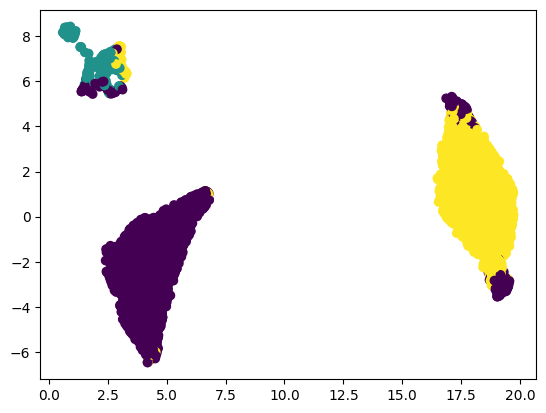

In [7]:
import matplotlib.pyplot as plt

print(umap.shape)
print(clusters.shape)

plt.scatter(umap[:, 0], umap[:, 1], c=clusters)

In [8]:
from get_embeddings import MAE_HIC
import os
import torchvision.datasets as datasets

data_path = '/gpfs/scratch/shenkn01/mae_input'
model_path = '/gpfs/data/abl/home/shenkn01/MAE/mae/output_dir/checkpoint-799.pth'
mae_hic = MAE_HIC(model_path, data_path)

# dataloader = mae_hic.load_dataset()
dataset_train = datasets.ImageFolder(os.path.join(data_path, 'train'))

images = []
labels = []
for i, x in enumerate(dataset_train):
    image_batch, label = x
    images.append(image_batch)
    labels.append(label)

Cluster: 0
[2, 5, 6, 9, 12, 14, 17, 18, 21, 22, 23, 24, 27, 28, 29, 30, 32, 35, 37, 38, 42, 47, 49, 54, 56, 58, 60, 62, 63, 64, 66, 67, 69, 71, 73, 74, 77, 78, 79, 80, 81, 84, 85, 86, 87, 90, 91, 95, 97, 99, 103, 104, 106, 111, 115, 116, 119, 120, 121, 123, 125, 126, 127, 131, 132, 134, 135, 137, 140, 142, 145, 146, 148, 151, 153, 157, 168, 207, 211, 212, 213, 214, 216, 218, 219, 220, 221, 222, 226, 229, 230, 231, 234, 235, 236, 238, 240, 242, 246, 252, 256, 257, 258, 260, 263, 265, 267, 268, 270, 271, 272, 273, 274, 275, 277, 281, 283, 284, 285, 286, 288, 290, 291, 292, 293, 295, 297, 298, 299, 302, 304, 306, 307, 309, 310, 311, 313, 314, 316, 318, 319, 320, 322, 324, 326, 327, 328, 329, 334, 337, 339, 342, 343, 344, 345, 348, 349, 350, 354, 356, 357, 358, 359, 360, 364, 365, 366, 367, 374, 376, 378, 379, 381, 383, 384, 385, 387, 388, 389, 390, 392, 393, 395, 397, 398, 400, 401, 402, 403, 406, 407, 408, 410, 411, 412, 414, 416, 418, 419, 421, 422, 424, 427, 428, 429, 430, 434, 435, 43

TypeError: Invalid shape (1,) for image data

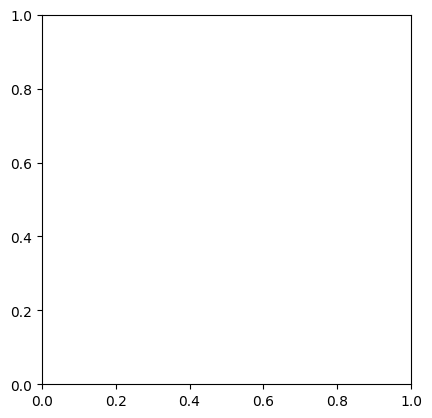

In [28]:
import torchvision
import random
from torchvision.io import read_image
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


num_samples = 16
cluster_names = np.unique(clusters)
for cluster_name in cluster_names:
    print(f"Cluster: {cluster_name}")
    cluster_idxes = np.argwhere(clusters == cluster_name)
    cluster_idxes = cluster_idxes.reshape(-1).tolist()   
    print(cluster_idxes)
    cluster_images = [x for i, x in enumerate(images) if i in set(cluster_idxes)]
    # cluster_image_tensors = [torchvision.transforms.functional.pil_to_tensor(x) for x in cluster_images]
    plt.figure()
    plt.imshow(image_grid(random.choices(cluster_images, k=25), 5, 5))
    
    #for i in range(len(cluster_image_tensors)):
    #    cluster_image_tensors[i] = cluster_image_tensors[i].float()
    #    cluster_image_tensors[i] = (cluster_image_tensors[i] - cluster_image_tensors[i].min()) / (cluster_image_tensors[i].max() - cluster_image_tensors[i].min())
    
    #cluster_tensor = torch.concat(cluster_image_tensors)
    
    #n, w, h = cluster_tensor.shape
    #cluster_tensor = cluster_tensor.reshape(n, 1, w, h).repeat(1, 3, 1, 1)
    #cluster_tensor[:, 0] = 255.
    #grid_img = torchvision.utils.make_grid(cluster_tensor)
    
    #plt.imshow(grid_img.permute(1, 2, 0))

In [27]:
print(dataset_train.imgs[961])

('/gpfs/scratch/shenkn01/mae_input/train/chr12/window_56.jpeg', 2)


In [17]:
dataset_train.imgs[8]

('/gpfs/scratch/shenkn01/mae_input/train/chr8/window_35.jpeg', 18)